Desafio 27: Análise de Despesas Mensais de Clientes

📂 Dataset: Registro de despesas mensais de clientes categorizadas por tipo de gasto.
Colunas: Cliente, Mês, Categoria, Valor

🎯 Tarefas:

    Trate a coluna Valor, convertendo para numérico e tratando valores inválidos como "", "desconhecido" e NaN.

    Qual o gasto médio por categoria?

    Qual foi o mês com o maior total de despesas?

    Identifique o cliente com o maior gasto total ao longo dos meses.

    Gere um gráfico de pizza com a distribuição percentual de gastos por categoria.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("dia_27_despesas_clientes.csv")
df.head()

,Cliente,Mês,Categoria,Valor
0,Cliente_15,Jun,Moradia,3500.0
1,Cliente_43,Abr,Saúde,4550.0
2,Cliente_22,Jun,Educação,1500.0
3,Cliente_30,Mai,Transporte,2600.0
4,Cliente_43,Jun,Educação,3200.0


In [53]:
#Trate a coluna Valor, convertendo para numérico e tratando valores inválidos como "", "desconhecido" e NaN.
df["Valor"] = pd.to_numeric(df["Valor"], errors="coerce")
df["Valor"] = df["Valor"].fillna(df.groupby("Categoria")["Valor"].transform("mean"))
df["Valor"] = df["Valor"].astype("int")
print(f"Quantidade de valores Nulos: {df["Valor"].isnull().sum()}")

Quantidade de valores Nulos: 0


In [54]:
#Qual o gasto médio por categoria?
gastoMedioCategoria = df.groupby("Categoria")["Valor"].mean().round(2)
print(gastoMedioCategoria.apply(lambda x: f"R$ {x}").to_string())

Categoria
Alimentação    R$ 2493.52
Educação       R$ 2360.79
Lazer          R$ 2641.41
Moradia         R$ 2670.0
Saúde           R$ 2438.3
Transporte     R$ 2158.13


In [55]:
#Qual foi o mês com o maior total de despesas?
mesMaiorDespesa = df.groupby("Mês")["Valor"].sum().sort_values(ascending=False)
print(f"O mês com maior total de despesas foi: {mesMaiorDespesa.idxmax()}. com um total de R$ {mesMaiorDespesa.max()}.")

O mês com maior total de despesas foi: Mar. com um total de R$ 117701.


In [56]:
#Identifique o cliente com o maior gasto total ao longo dos meses.
clienteMaiorGasto = df.groupby("Cliente")["Valor"].sum().sort_values(ascending=False)
print(clienteMaiorGasto.idxmax())

Cliente_38


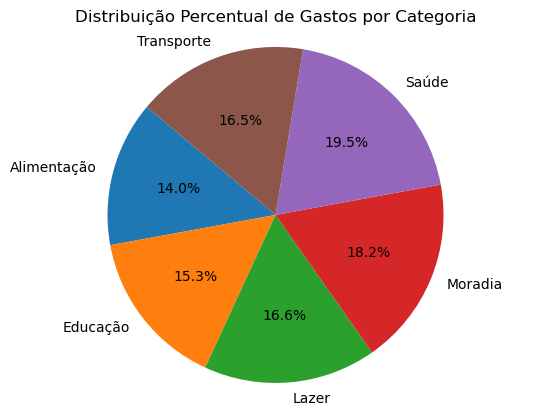

In [57]:
#Gere um gráfico de pizza com a distribuição percentual de gastos por categoria.
gastoTotalCategoria = df.groupby("Categoria")["Valor"].sum()

plt.pie(gastoTotalCategoria, labels=gastoTotalCategoria.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribuição Percentual de Gastos por Categoria")
plt.axis("equal")
plt.show()